In [2]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
movie = pd.read_csv('/home/kuheli/Documents/Study/PythonForDataScience/Datasets/Week-4-Pandas/movielens/movies.csv')
print(movie.shape)
print(movie.head(6))

(27278, 3)
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   
5        6                         Heat (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  
5                        Action|Crime|Thriller  


In [4]:
movie['year'] = movie['title'].str.extract('.*\((.*)\).*', expand = True)
print(movie.head(5))

   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  year  
0  Adventure|Animation|Children|Comedy|Fantasy  1995  
1                   Adventure|Children|Fantasy  1995  
2                               Comedy|Romance  1995  
3                         Comedy|Drama|Romance  1995  
4                                       Comedy  1995  


In [5]:
ratings =  pd.read_csv('/home/kuheli/Documents/Study/PythonForDataScience/Datasets/Week-4-Pandas/movielens/ratings.csv')
print (ratings.shape)
del ratings['timestamp']
print (ratings.shape)
print(ratings.head(5))

(20000263, 4)
(20000263, 3)
   userId  movieId  rating
0       1        2     3.5
1       1       29     3.5
2       1       32     3.5
3       1       47     3.5
4       1       50     3.5


In [6]:
merged = movie.merge(ratings,on = 'movieId', how ='inner')
print(merged.head(5))
merged.title.duplicated().sum()
merged.shape

   movieId             title                                       genres  \
0        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
1        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
2        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
3        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
4        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   

   year  userId  rating  
0  1995       3     4.0  
1  1995       6     5.0  
2  1995       8     4.0  
3  1995      10     4.0  
4  1995      11     4.5  


(20000263, 6)

In [7]:
movieChart = merged.drop_duplicates(subset = ['movieId', 'title', 'genres', 'year']).sort_values('year')
movieChart['year'] = pd.to_numeric(movieChart['year'], errors='coerce') 
print(movieChart.tail(15))

          movieId                                 title                genres  \
19982376   113190                    Slaying the Badger           Documentary   
19987702   115133            Tatort: Im Schmerz geboren                 Crime   
19990159   115685   National Theatre Live: Frankenstein         Drama|Fantasy   
19998235   125571  The Court-Martial of Jackie Robinson    (no genres listed)   
19998245   125632                         In Our Garden    (no genres listed)   
19998419   125958    Stephen Fry In America - New World    (no genres listed)   
19998661   126438        Two: The Story of Roman & Nyro     Documentary|Drama   
19998791   126929                         Li'l Quinquin    (no genres listed)   
19998835   127005       A Year Along the Abandoned Road    (no genres listed)   
19999353   128612                            Body/Cialo  Comedy|Drama|Mystery   
19999421   128734                         Polskie gówno        Comedy|Musical   
19999771   129651      The T

In [8]:
movieChart.isnull().any()
movieChart.shape

(26744, 6)

In [9]:
movieChart = movieChart.dropna()
movieChart.shape

(26721, 6)

In [10]:
print(movieChart.tail(15))

          movieId                                              title  \
19998662   126482                               Strange Magic (2015)   
19999803   129737                         Unfinished Business (2015)   
19998620   126420                              American Heist (2015)   
20000101   130578                                  The Gunman (2015)   
19998227   125543                             Against The Sun (2015)   
20000092   130520                                        Home (2015)   
19993681   117466                     In the Heart of the Sea (2015)   
19999837   129822                               Bikes vs Cars (2015)   
19999841   129826  LEGO DC Comics Super Heroes: Justice League vs...   
19999447   128842         Dragonheart 3: The Sorcerer's Curse (2015)   
20000060   130496                                    Big Game (2015)   
19998258   125661                                Paper Planes (2015)   
20000033   130490                                   Insurgent (2

In [11]:
print('from:', movieChart['year'].min(), 'to', movieChart['year'].max())

from: 1891.0 to 2015.0


In [12]:
comedy = movieChart[(movieChart['genres'] == 'Comedy')]
print(comedy.count)
avg_comedy = comedy['rating'].mean()
print(avg_comedy)

<bound method DataFrame.count of           movieId                                              title  genres  \
19982145   113048               Tables Turned on the Gardener (1895)  Comedy   
19997329   120803                            Those Awful Hats (1909)  Comedy   
19897336   103040                          His New Profession (1914)  Comedy   
19920931   105081                          Mabel at the Wheel (1914)  Comedy   
19488654    76758                  Tillie's Punctured Romance (1914)  Comedy   
10084867     2230                       Always Tell Your Wife (1914)  Comedy   
19990545   116094                        Mabel's Married Life (1914)  Comedy   
19990543   116092                                  By the Sea (1915)  Comedy   
19898460   103044                                  Shanghaied (1915)  Comedy   
19920891   105051                         Jitney Elopement, A (1915)  Comedy   
19895733   102901                                 In the Park (1915)  Comedy   
1992088

In [13]:
romance = movieChart[(movieChart['genres'] == 'Romance')]
print(romance.shape)
avg_romance = romance['rating'].mean()
print(avg_romance)

(77, 6)
2.909090909090909


In [14]:
fantasy = movieChart[(movieChart['genres'] == 'Fantasy')]
print(fantasy.shape)
avg_fantasy = fantasy['rating'].mean()
print(avg_fantasy)

(27, 6)
2.925925925925926


In [15]:
documentary = movieChart[(movieChart['genres'] == 'Documentary')]
print(documentary.shape)
avg_documentary = documentary['rating'].mean()
print(avg_documentary)

(1876, 6)
3.463486140724947


In [16]:
action = movieChart[(movieChart['genres'] == 'Action')]
print(action.shape)
avg_action = action['rating'].mean()
print(avg_action)

(176, 6)
2.4744318181818183


In [17]:
scifi = movieChart[(movieChart['genres'] == 'Sci-Fi')]
print(scifi.shape)
avg_scifi = scifi['rating'].mean()
print(avg_scifi)

(116, 6)
2.689655172413793


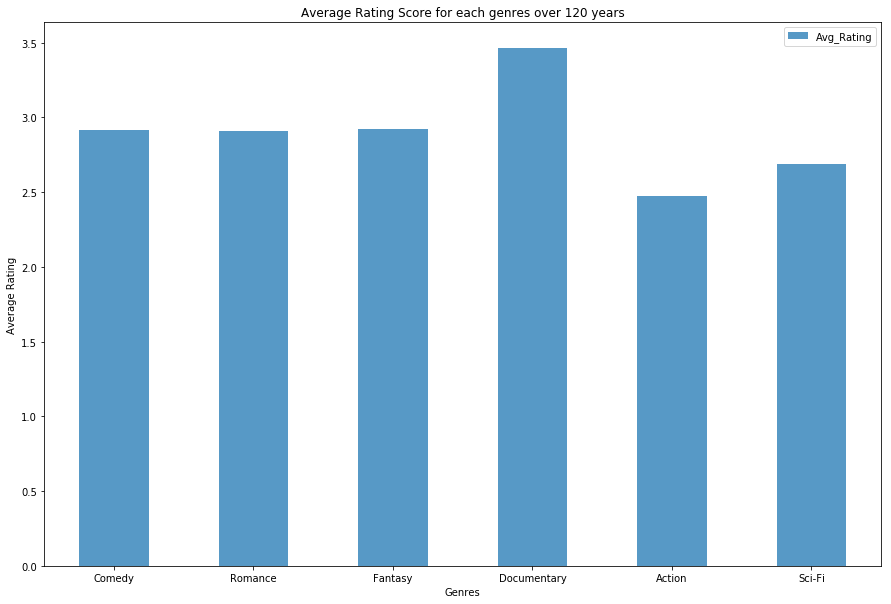

In [18]:
movie_df = pd.DataFrame({"Genres": ['Comedy', 'Romance', 'Fantasy','Documentary', 'Action', 'Sci-Fi'], "Avg_Rating": [2.913, 2.909, 2.925, 3.463, 2.474, 2.689]})
movie_df = movie_df[["Genres","Avg_Rating"]]
movie_df.set_index(["Genres"],inplace=True)
movie_df.plot(kind='bar',alpha=0.75, rot=0,figsize=(15,10))
plt.title('Average Rating Score for each genres over 120 years')
plt.xlabel("Genres")
plt.ylabel("Average Rating")
plt.show()